<a href="https://colab.research.google.com/github/phu234/Texxgen/blob/master/Copy_of_Untitled2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

img = cv2.imread("img.jpg", 0)



In [ ]:
def compute_hist(img):
    hist = np.zeros((256,), np.uint8)
    h, w = img.shape[:2]
    for i in range(h):
        for j in range(w):
            hist[img[i][j]] += 1
    return hist

In [ ]:
def equal_hist(hist):
    cumulator = np.zeros_like(hist, np.float64)
    for i in range(len(cumulator)):
        cumulator[i] = hist[:i].sum()
    print(cumulator)
    new_hist = (cumulator - cumulator.min())/(cumulator.max() - cumulator.min()) * 255
    new_hist = np.uint8(new_hist)
    return new_hist

[    0.   157.   318.   441.   658.   658.   894.   934.  1181.  1181.
  1331.  1484.  1599.  1796.  2002.  2002.  2143.  2327.  2375.  2606.
  2756.  2756.  2952.  3100.  3246.  3484.  3484.  3617.  3821.  3821.
  4035.  4159.  4405.  4405.  4626.  4626.  4869.  4869.  5008.  5254.
  5254.  5495.  5628.  5788.  5788.  6007.  6137.  6386.  6386.  6510.
  6660.  6713.  6761.  6761.  6977.  6977.  7121.  7371.  7371.  7557.
  7628.  7641.  7641.  7863.  7980.  8186.  8186.  8370.  8518.  8712.
  8712.  8859.  8954.  9194.  9194.  9399.  9633.  9633.  9787.  9904.
  9984. 10155. 10334. 10404. 10585. 10730. 10959. 10959. 11076. 11309.
 11309. 11558. 11558. 11799. 11979. 11979. 12130. 12197. 12341. 12497.
 12671. 12685. 12685. 12864. 12864. 12873. 12873. 13061. 13178. 13372.
 13476. 13611. 13652. 13891. 14076. 14076. 14229. 14409. 14502. 14745.
 14745. 14943. 15185. 15185. 15324. 15490. 15490. 15685. 15877. 15877.
 16022. 16162. 16336. 16442. 16476. 16476. 16586. 16671. 16877. 17107.
 17107

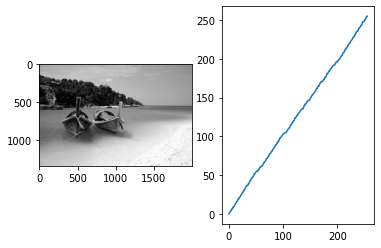

In [ ]:
hist = compute_hist(img).ravel()
new_hist = equal_hist(hist)
h, w = img.shape[:2]
for i in range(h):
   for j in range(w):
       img[i,j] = new_hist[img[i,j]]
       
fig = plt.figure()
ax = plt.subplot(121)
plt.imshow(img, cmap='gray')

plt.subplot(122)
plt.plot(new_hist)
plt.show()